In [1]:
DEBUG=False

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from neural_network_wrapper import NeuralNetworkWrapper

from sklearn.metrics import accuracy_score
import optimizers

In [3]:
data = pd.read_csv("./projekt1/classification/data.simple.train.1000.csv")

In [4]:
X = np.array(data.loc[:, ['x', 'y']])
y = data.cls
y -= 1

In [5]:
#X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [6]:
#one hot encoding
y_ohc = np.zeros((y.size, int(np.max(y))+1))
y_ohc[np.arange(y.size),y.astype(np.int)] = 1
y = y_ohc

if DEBUG:
    X = X[:1000, :]
    y = y[:1000, :]

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Loss after 1 epochs: 2.120
Loss after 2 epochs: 1.541
Loss after 3 epochs: 1.343
Loss after 4 epochs: 1.253
Loss after 5 epochs: 1.203
Loss after 6 epochs: 1.168
Loss after 7 epochs: 1.139
Loss after 8 epochs: 1.112
Loss after 9 epochs: 1.086
Loss after 10 epochs: 1.059
Final loss: 1.059


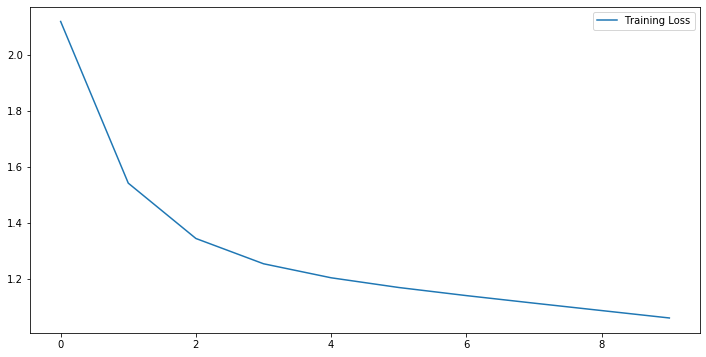

Accuracy on test set: 0.66


In [9]:
NN1 = NeuralNetworkWrapper(2,
                          [4, 4, 2],
                          ['relu', 'relu', 'sigmoid'],
                          'logistic_loss',
                          0.01,
                           optimizers.Optimizer(),
                          128)
NN1.train(X_train,
          y_train,
          10,
          0,
         cache_weights_on_epoch=True)
NN1.plot_loss()

y_hat = NN1.predict(X_test)

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

In [17]:
import network_state_visualisation

State 1/10
State 2/10
State 3/10
State 4/10
State 5/10
State 6/10
State 7/10
State 8/10
State 9/10
State 10/10


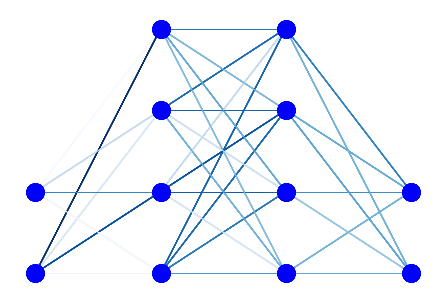

In [18]:
network_state_visualisation.make_network_state_gif(NN1.cache_weights_on_epoch,
                                                   "./.temporary_pngs/",
                                                   'network_state.gif')